# 6.5 EV Unsupervised Clustering Model

## This script will include the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/mitchellkubik/Desktop/Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path, 'Assignment Data', 'Prepared EV Data', 'Cleaned EV DF for Regression Model.csv'))

In [5]:
df.shape

(159458, 11)

In [6]:
df.head()

,Unnamed: 0,county,city,state,year,make,model,electric_range,base_msrp,dol_v_id,geo_id
0,0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,33,0,349437882,5.303509e+10
1,1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,32,0,154690532,5.306595e+10
2,2,Yakima,Yakima,WA,2022,KIA,EV6,0,0,219969144,5.307700e+10
3,3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,215,0,476786887,5.303509e+10
4,4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,151,0,201185253,5.306701e+10


In [7]:
df = df.drop('Unnamed: 0', axis = 1)

In [8]:
df.head()

,county,city,state,year,make,model,electric_range,base_msrp,dol_v_id,geo_id
0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,33,0,349437882,5.303509e+10
1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,32,0,154690532,5.306595e+10
2,Yakima,Yakima,WA,2022,KIA,EV6,0,0,219969144,5.307700e+10
3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,215,0,476786887,5.303509e+10
4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,151,0,201185253,5.306701e+10


In [9]:
# Create subset with only numerical values

df_int = df[['year', 'electric_range', 'base_msrp', 'dol_v_id', 'geo_id']]

## 2. The elbow technique

In [10]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [11]:
score = [kmeans[i].fit(df_int).score(df_int) for i in range(len(kmeans))]

score

/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

[-4.2029100704212466e+23,
 -3.060469036970329e+22,
 -1.0173572280595593e+22,
 -4.941710635846508e+21,
 -3.478476191743134e+21,
 -2.547089400980312e+21,
 -2.063417421373248e+21,
 -1.5827645743116953e+21,
 -1.2765786243209922e+21]

<function matplotlib.pyplot.show(close=None, block=None)>

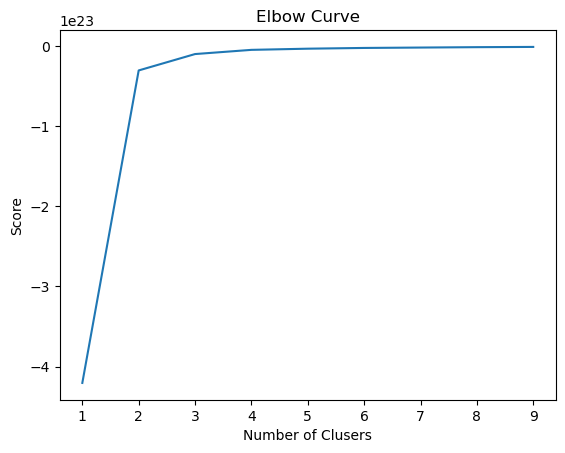

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusers')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show

**Optimal cluster count is 3.**

## 3. K-means clustering

In [13]:
kmeans = KMeans(n_clusters = 3)

In [14]:
kmeans.fit(df_int)

/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df_int['clusters'] = kmeans.fit_predict(df_int)

/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vg/xnv5b74d6rl3vyybq_k0cn9h0000gn/T/ipykernel_11310/2509193446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['clusters'] = kmeans.fit_predict(df_int)


In [16]:
df_int

,year,electric_range,base_msrp,dol_v_id,geo_id,clusters
0,2017,33,0,349437882,5.303509e+10,0
1,2020,32,0,154690532,5.306595e+10,0
2,2022,0,0,219969144,5.307700e+10,0
3,2018,215,0,476786887,5.303509e+10,0
4,2018,151,0,201185253,5.306701e+10,0
...,...,...,...,...,...,...
159453,2023,33,0,235949514,5.305995e+10,0
159454,2021,0,0,148544168,5.305795e+10,0
159455,2023,32,0,240200754,5.303303e+10,0
159456,2019,220,0,156680590,5.307300e+10,0


In [17]:
df_int['clusters'].value_counts()

0    159173
1       177
2       108
Name: clusters, dtype: int64

In [18]:
#Create subset of df_int where the base msrp is over $0

df_int_clean = df_int[df_int['base_msrp'] > 0]

In [19]:
kmeans.fit(df_int_clean)

/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
df_int_clean['clusters'] = kmeans.fit_predict(df_int_clean)

/Users/mitchellkubik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vg/xnv5b74d6rl3vyybq_k0cn9h0000gn/T/ipykernel_11310/2913962684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_clean['clusters'] = kmeans.fit_predict(df_int_clean)


In [21]:
df_int_clean['clusters'].value_counts()

0    3413
2       5
1       4
Name: clusters, dtype: int64

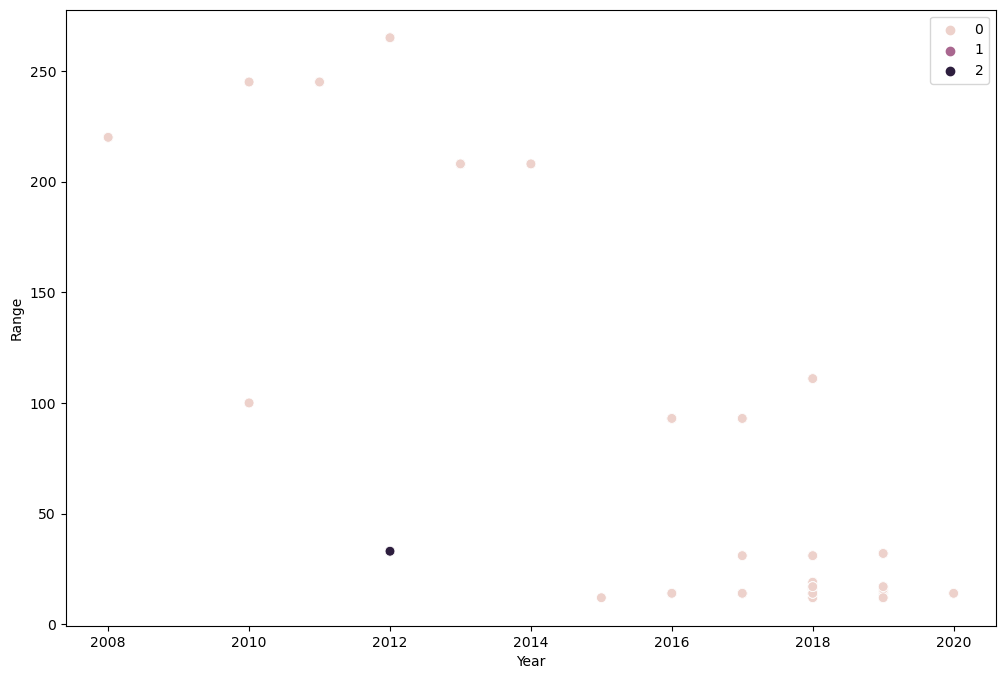

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_int_clean['year'], y=df_int_clean['electric_range'], hue=kmeans.labels_, s=50) 

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Range') 
plt.show()

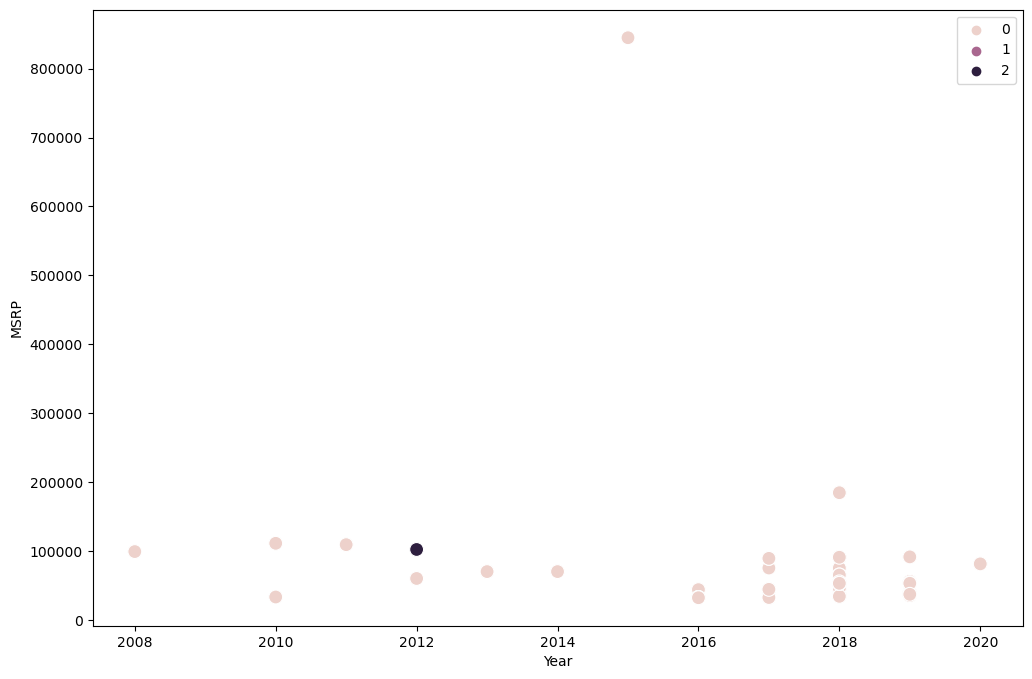

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_int_clean['year'], y=df_int_clean['base_msrp'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('MSRP') 
plt.show()

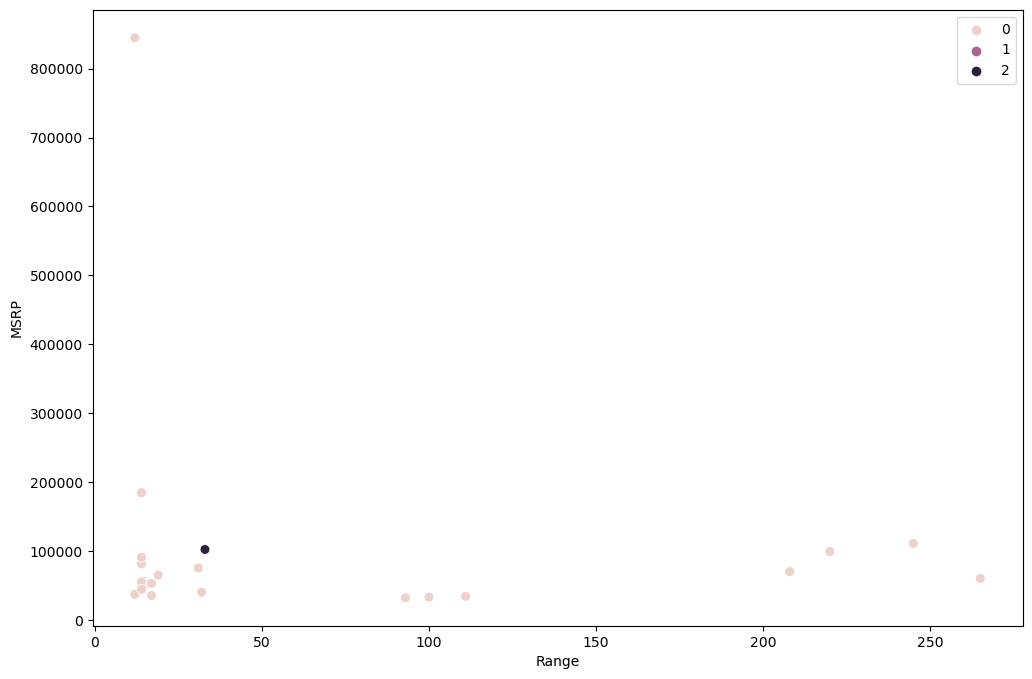

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_int_clean['electric_range'], y=df_int_clean['base_msrp'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Range') 
plt.ylabel('MSRP') 
plt.show()

In [25]:
df_int_clean.loc[df_int_clean['clusters'] == 2, 'cluster'] = 'dark purple'
df_int_clean.loc[df_int_clean['clusters'] == 1, 'cluster'] = 'purple'
df_int_clean.loc[df_int_clean['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/vg/xnv5b74d6rl3vyybq_k0cn9h0000gn/T/ipykernel_11310/2931678861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_clean.loc[df_int_clean['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
df_int_clean.groupby('cluster').agg({'year' : ['mean', 'median'],
                          'electric_range' : ['mean', 'median'],
                          'base_msrp' : ['mean', 'median']})

year         electric_range            base_msrp         
                    mean  median           mean median          mean   median
cluster                                                                      
dark purple  2014.400000  2013.0     111.200000   93.0  72890.000000  69900.0
pink         2015.562848  2016.0     123.238793   93.0  57148.570173  59900.0
purple       2015.750000  2015.5     115.500000  120.0  55973.750000  57000.0

In [27]:
df_int_clean

,year,electric_range,base_msrp,dol_v_id,geo_id,clusters,cluster
6,2019,12,36900,146830148,5.307700e+10,0,pink
94,2016,93,31950,132370066,5.307192e+10,0,pink
143,2014,208,69900,222335347,5.303302e+10,0,pink
304,2018,14,54950,135760355,5.301500e+10,0,pink
325,2014,208,69900,232164236,5.303301e+10,0,pink
...,...,...,...,...,...,...,...
159204,2018,17,52900,241036617,5.305596e+10,0,pink
159352,2013,208,69900,185113197,5.303302e+10,0,pink
159389,2016,93,31950,116579214,5.305795e+10,0,pink
159390,2016,93,31950,199070371,5.300501e+10,0,pink


In [28]:
df_int_clean['base_msrp'].max()

845000

In [29]:
df_int_clean_2 = df_int_clean[df_int_clean['base_msrp'] <845000]

In [30]:
df_int_clean_2['base_msrp'].max()

184400

**Hey Owen. I'm not quite sure what to make of these clusters. When I try to create a scatterplot with df_int_clean_2, my array length is one value greater than the index length. I think removing the data point containing the $845000 car will with the scale issue and maybe provide some clearer insights. Merry Christmas and thank you for all your help!**

In [31]:
df_int_clean_2.to_csv(os.path.join(path, 'Assignment Data', 'Prepared EV Data', 'df_ev_int.csv'))